# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

MIMIC-III-sepsis: 4165
Number of attribues: 26
Classes total: 3301 - 864

Classes train: 990 - 259
Classes test:  2311 - 605


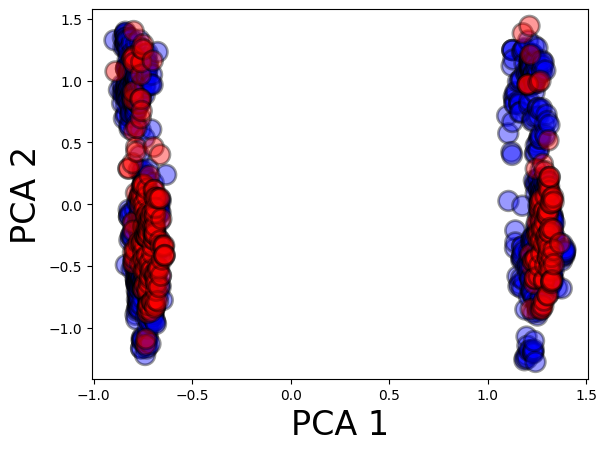

int64


In [2]:
dataset = 'MIMIC-III-sepsis' # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP-small'
model = 'MLP'
# model = 'MLP-deep'
model = 'MIMIC'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

In [3]:
data_clf['data']['X'].shape

(1249, 26)

## Get Classifier

Baseline


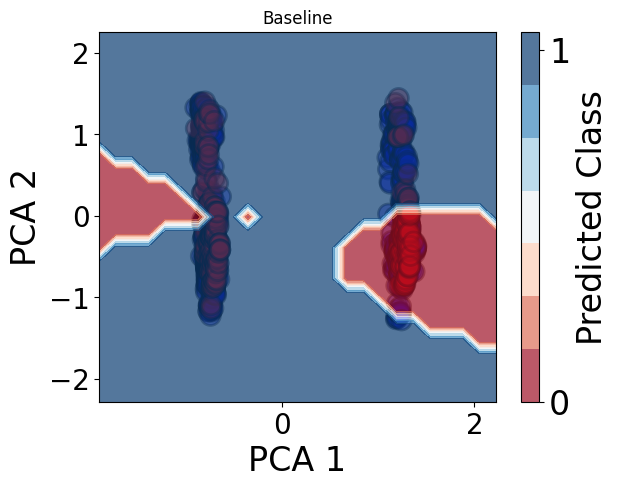

SMOTE


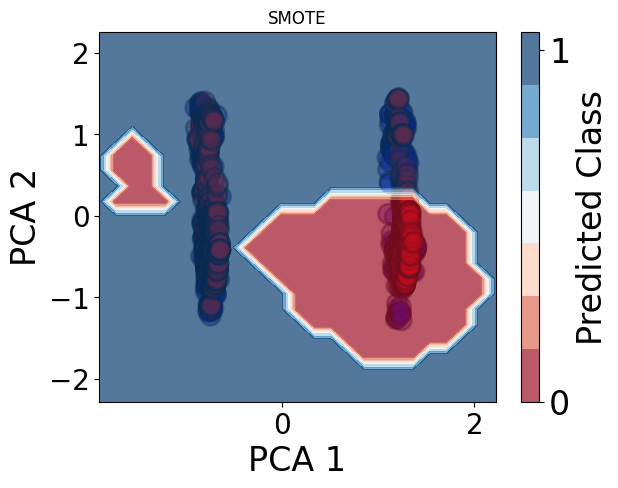

Balanced Weights


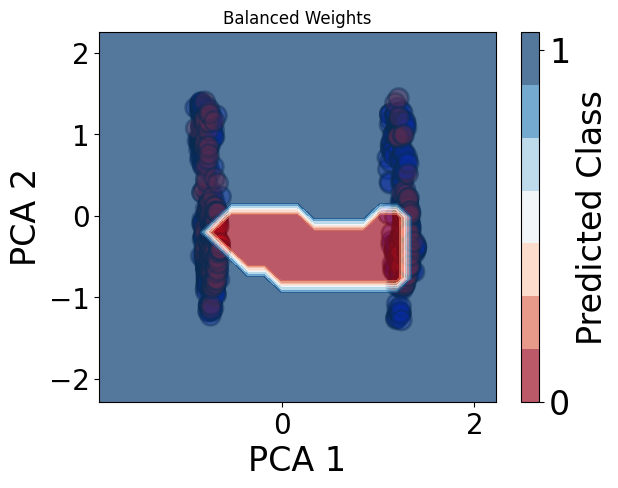

BMR


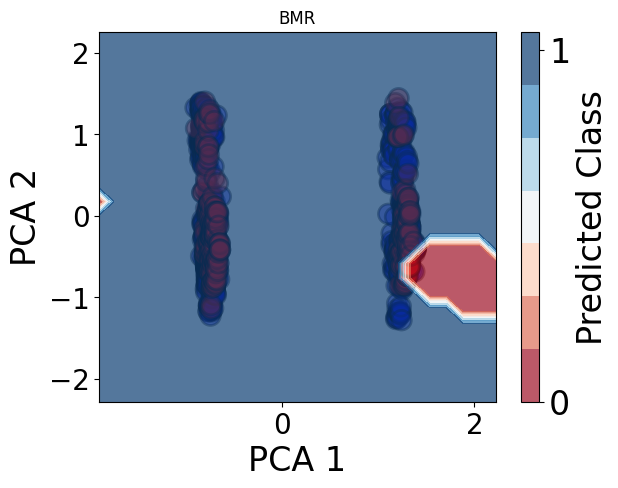

Threshold


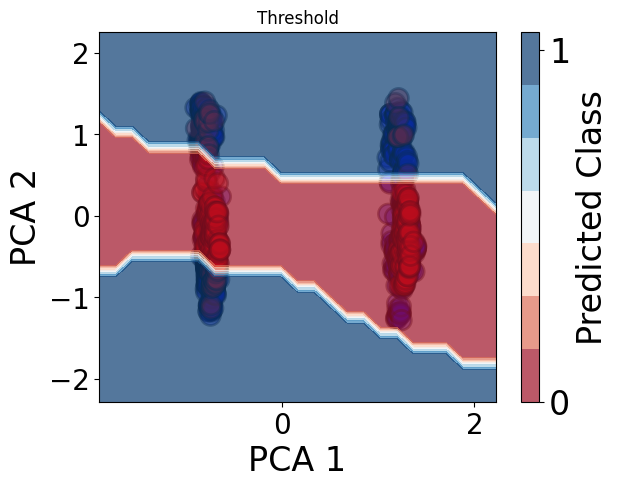

In [4]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data
plotting training data as data input


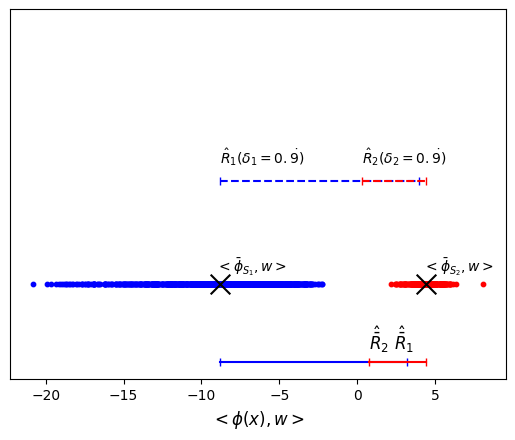

Budget 624 found 66 viable downsampled solutions
Best solution found by removing 20 data points
Downsampled Data:


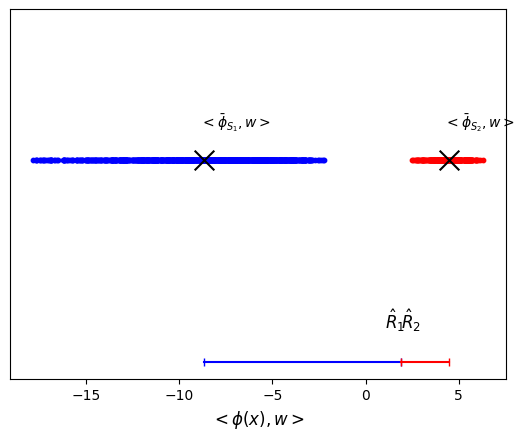

In [5]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                    #  method='supports-prop-update_mean-margin_only',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

plotting training data as data input


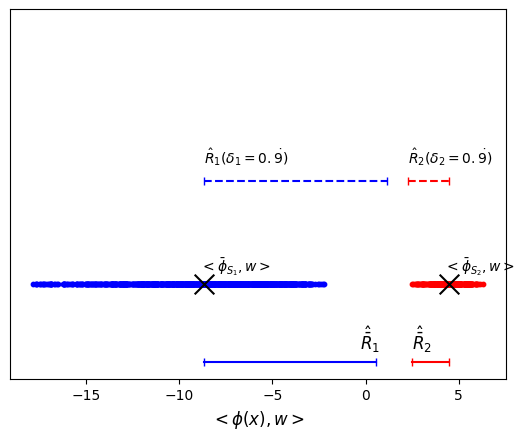

In [6]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [7]:
deltas_model.print_params()

Parameters
                R:  17.885591098045555
                N1: 974
                N2: 255
                R1: 9.23001748450969
                R2: 1.943675969248238
                M:  1.9430714268300413
                D:  13.116764880587969
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Baseline          0.967078  0.936402  0.981031  0.917949
SMOTE             0.970165  0.944874  0.985329  0.926334
Balanced Weights  0.970165  0.942898  0.984418  0.925957
BMR               0.947874  0.875166  0.981031  0.859779
Threshold         0.968450  0.955443  0.981031  0.924714
Our Method        0.950617  0.884121  0.981031  0.868613 


Baseline


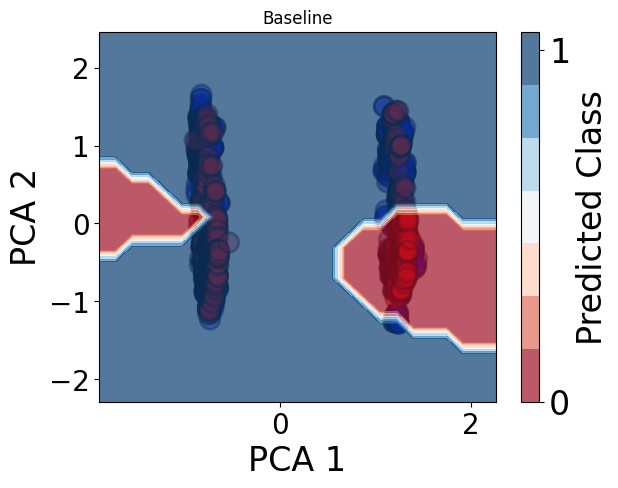

SMOTE


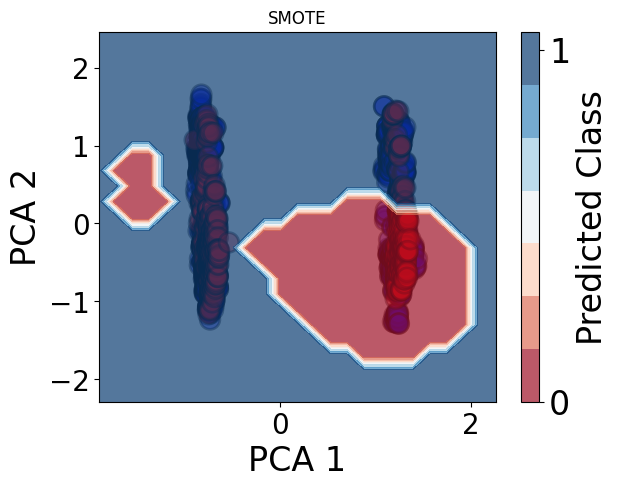

Balanced Weights


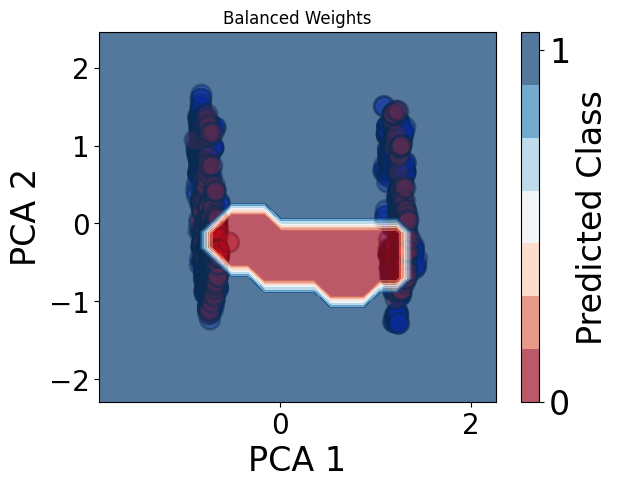

BMR


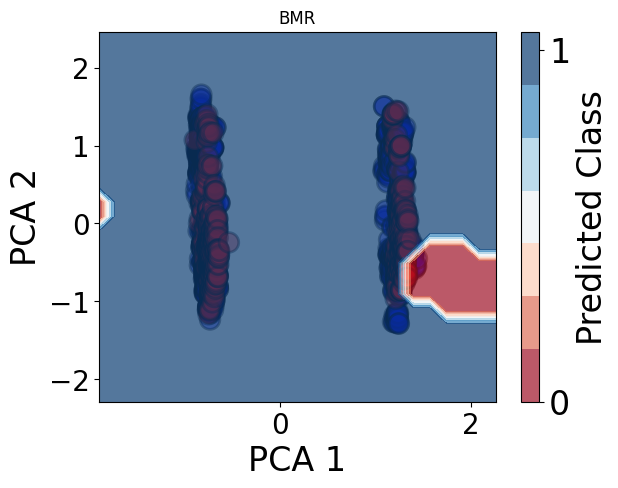

Threshold


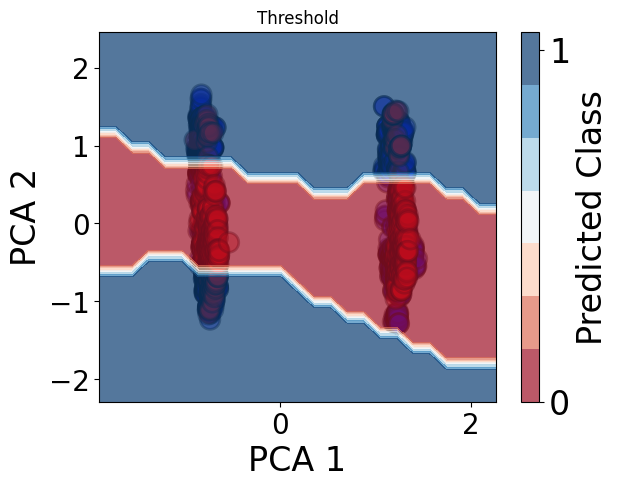

Our Method


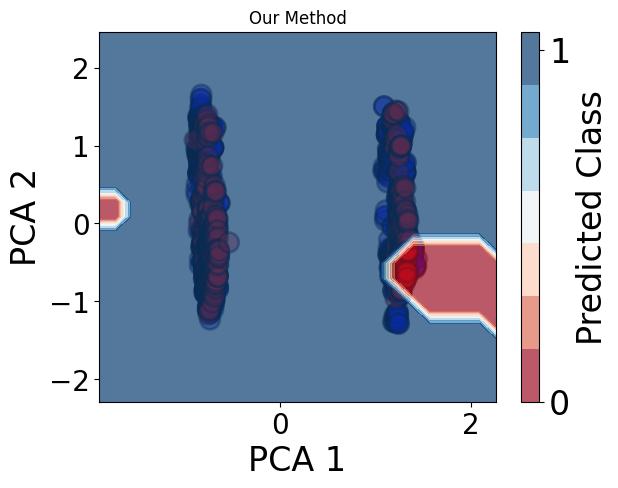

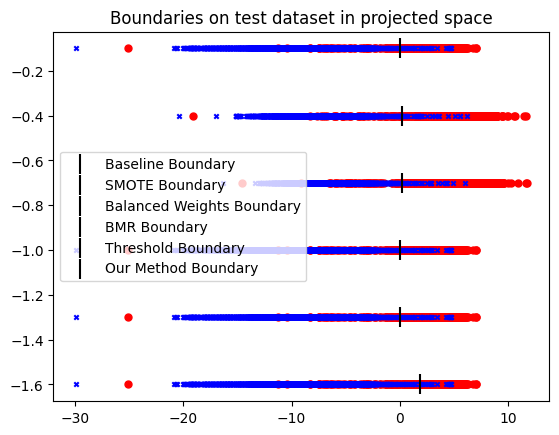

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9671 & 0.9364 & 0.9810 & 0.9179 \\
SMOTE & 0.9702 & 0.9449 & 0.9853 & 0.9263 \\
Balanced Weights & 0.9702 & 0.9429 & 0.9844 & 0.9260 \\
BMR & 0.9479 & 0.8752 & 0.9810 & 0.8598 \\
Threshold & 0.9684 & 0.9554 & 0.9810 & 0.9247 \\
Our Method & 0.9506 & 0.8841 & 0.9810 & 0.8686 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.967078,0.936402,0.981031,0.917949
SMOTE,0.970165,0.944874,0.985329,0.926334
Balanced Weights,0.970165,0.942898,0.984418,0.925957
BMR,0.947874,0.875166,0.981031,0.859779
Threshold,0.968450,0.955443,0.981031,0.924714
Our Method,0.950617,0.884121,0.981031,0.868613


In [8]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])